In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model

In [2]:
# Load the image
img = cv2.imread('images.png')
gray_img = cv2.imread('images.png', cv2.IMREAD_GRAYSCALE)

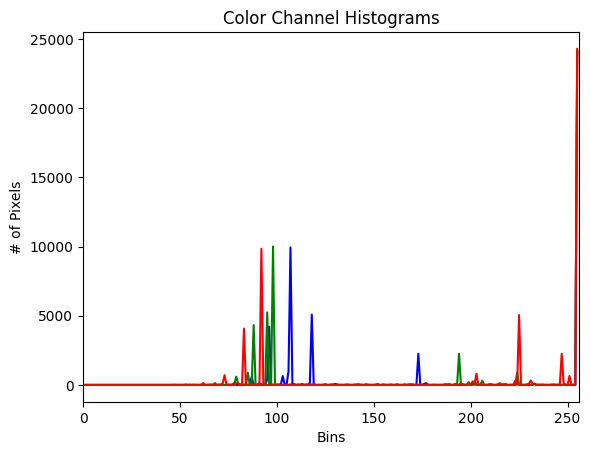

In [14]:
# 1. Color Histogram

channels = cv2.split(img)
colors = ('b', 'g', 'r')  
plt.figure()
plt.title("Color Channel Histograms")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for channel, color in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.show()

In [ ]:
# 2. Edge Detection (Canny)
edges = cv2.Canny(gray_img, 100, 200)
plt.figure()
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')
plt.show()

In [ ]:
# 3. Local Binary Pattern (LBP)
import os
import cv2
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(gray_img, n_points, radius, method="uniform")
plt.figure()
plt.title("Local Binary Pattern")
plt.imshow(lbp, cmap='gray')
plt.show()

In [ ]:
# 4. Contour Detection
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
plt.figure()
plt.title("Contour Detection")
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
orb = cv2.ORB_create()
keypoints = orb.detect(gray_img, None)
keypoints, descriptors = orb.compute(gray_img, keypoints)
keypoint_img = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)
plt.figure()
plt.title("ORB Keypoint Detection")
plt.imshow(cv2.cvtColor(keypoint_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 6. Deep Learning Features (ResNet)
def extract_deep_features(image_path):
    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    img = image.load_img(image_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

deep_features = extract_deep_features('images.png')
deep_features_np = np.array(deep_features)
plt.figure(figsize=(12, 10))
plt.subplot(6, 3, 6)
plt.title("Deep Features")
plt.plot(deep_features_np.flatten())
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')